In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('data.csv')
dataset

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [3]:
dataset.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [4]:
dataset.isnull()

,x1,x2,y
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2222,False,False,False
2223,False,False,False
2224,False,False,False
2225,False,False,False


<AxesSubplot:>

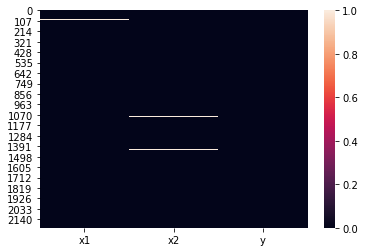

In [5]:
sns.heatmap(dataset.isnull())

Here, we have found some Null values in feature x1 and x2

In [6]:
dataset.isnull()

,x1,x2,y
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2222,False,False,False
2223,False,False,False
2224,False,False,False
2225,False,False,False


In [7]:
dataset.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

There are some Null values in the dataset and we will replace them with the mean of respective column but before that we need to check if there is any outlier exist or not !!

<AxesSubplot:xlabel='y', ylabel='count'>

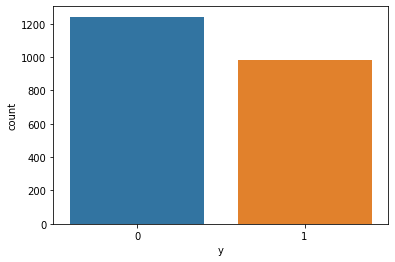

In [8]:
sns.countplot(x='y',data=dataset)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1', ylabel='x2'>

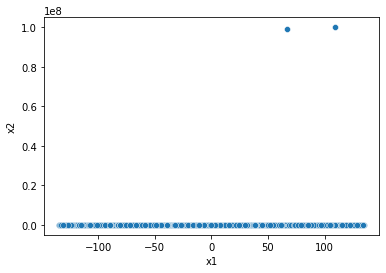

In [9]:
sns.scatterplot(dataset['x1'],dataset['x2'])

Above graph shows that only two outliers are there in our dataset and that is why we can remove those outliers and it won't affect our prediction ahead. 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1'>

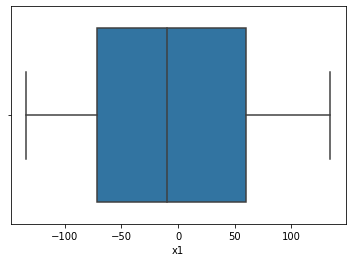

In [10]:
sns.boxplot(dataset['x1'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2'>

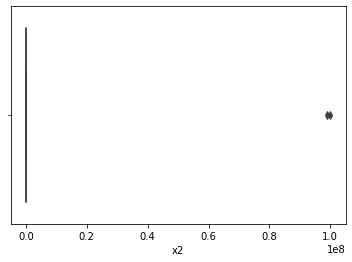

In [11]:
sns.boxplot(dataset['x2'])

Boxplot shows those two outliers

In [12]:
dataset.iloc[np.where(dataset['x2']>1e5)]

,x1,x2,y
1541,66.633331,99009998.0,0
2226,109.624009,99999999.0,0


In [13]:
dataset.drop([1541,2226], inplace=True)

In [14]:
dataset.reset_index(inplace=True, drop=True)

In [15]:
dataset

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
...,...,...,...
2220,88.129639,107.514918,0
2221,98.714112,89.643117,0
2222,96.633331,91.000000,0
2223,85.673940,103.839270,0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2'>

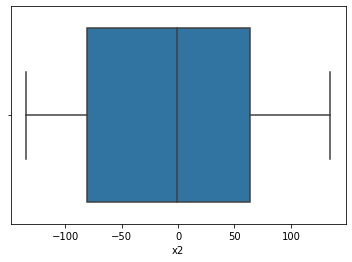

In [16]:
sns.boxplot(dataset['x2'])

After removing outliers

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1', ylabel='x2'>

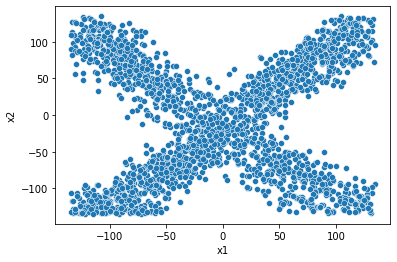

In [17]:
sns.scatterplot(dataset['x1'],dataset['x2'])

In [18]:
dataset['x1'] = dataset['x1'].fillna(dataset['x1'].mean())
dataset['x2'] = dataset['x2'].fillna(dataset['x2'].mean())

In [19]:
dataset.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1', ylabel='x2'>

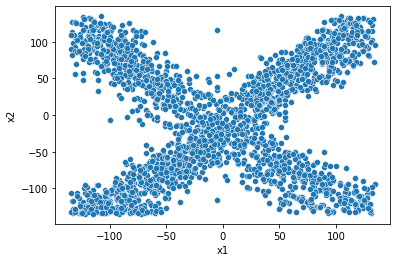

In [20]:
sns.scatterplot(dataset['x1'],dataset['x2'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x1', ylabel='Density'>

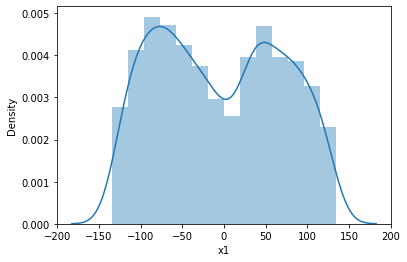

In [21]:
sns.distplot(dataset['x1'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x2', ylabel='Density'>

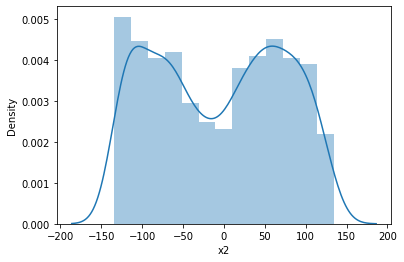

In [22]:
sns.distplot(dataset['x2'])

Here the values are too high, so we need to standardize features, so that it will increase the speed for prediction 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
features = dataset[['x1','x2']]
label = dataset['y']

In [25]:
features

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000
...,...,...
2220,88.129639,107.514918
2221,98.714112,89.643117
2222,96.633331,91.000000
2223,85.673940,103.839270


In [26]:
sc = StandardScaler()
sf = sc.fit_transform(features)

In [27]:
# create new dataframe with scaled features
sdf = pd.DataFrame(sf, columns = ['X1', 'X2'], index = dataset.index)
sdf

,X1,X2
0,-1.529905,1.524954
1,-1.285864,1.309072
2,-1.675753,1.421765
3,-1.467577,1.351920
4,-1.529905,1.524954
...,...,...
2220,1.243449,1.431132
2221,1.384919,1.207115
2222,1.357108,1.224123
2223,1.210627,1.385059


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X1', ylabel='Density'>

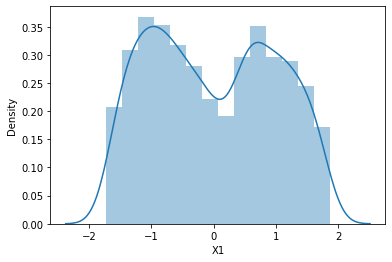

In [28]:
sns.distplot(sdf['X1'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X2', ylabel='Density'>

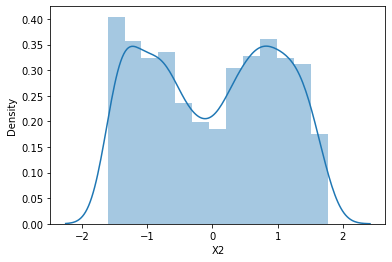

In [29]:
sns.distplot(sdf['X2'])

In [30]:
# merge scaled features back to the label
mergeddf = pd.merge(sdf,dataset.drop(['x1', 'x2'],axis=1), right_index=True, left_index=True)
mergeddf

,X1,X2,y
0,-1.529905,1.524954,1
1,-1.285864,1.309072,1
2,-1.675753,1.421765,1
3,-1.467577,1.351920,1
4,-1.529905,1.524954,1
...,...,...,...
2220,1.243449,1.431132,0
2221,1.384919,1.207115,0
2222,1.357108,1.224123,0
2223,1.210627,1.385059,0


In [32]:
mergeddf.to_csv('scaleddata.csv', index=False)